In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas  as pd


In [2]:
df=pd.read_csv('Road Accident Data.csv')
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,BS0000005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [4]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [6]:
cols=[
    'Accident Date','Time','Latitude','Longitude',
    'Weather_Conditions','Road_Surface_Conditions',
    'Light_Conditions','Accident_Severity'
]
df=df[cols]
df.head()

,Accident Date,Time,Latitude,Longitude,Weather_Conditions,Road_Surface_Conditions,Light_Conditions,Accident_Severity
0,01-01-2021,15:11,51.512273,-0.201349,Fine no high winds,Dry,Daylight,Serious
1,05-01-2021,10:59,51.514399,-0.199248,Fine no high winds,Wet or damp,Daylight,Serious
2,04-01-2021,14:19,51.486668,-0.179599,Fine no high winds,Dry,Daylight,Slight
3,05-01-2021,08:10,51.507804,-0.203110,Other,Frost or ice,Daylight,Serious
4,06-01-2021,17:25,51.482076,-0.173445,Fine no high winds,Dry,Darkness - lights lit,Serious


In [11]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], format='%d-%m-%Y')


df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour



In [12]:
df.isnull().sum()
df.dropna(inplace=True)

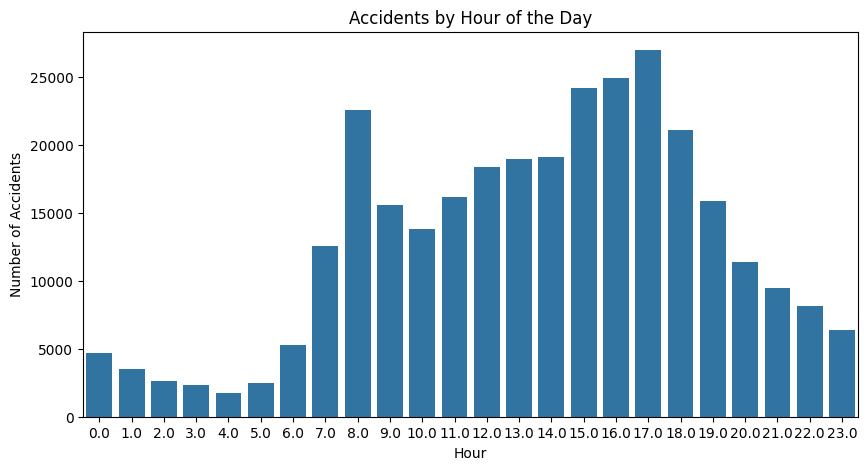

In [13]:
#Time of the Day Analysis

plt.figure(figsize=(10,5))
sns.countplot(x='Hour',data=df)
plt.title("Accidents by Hour of the Day")
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

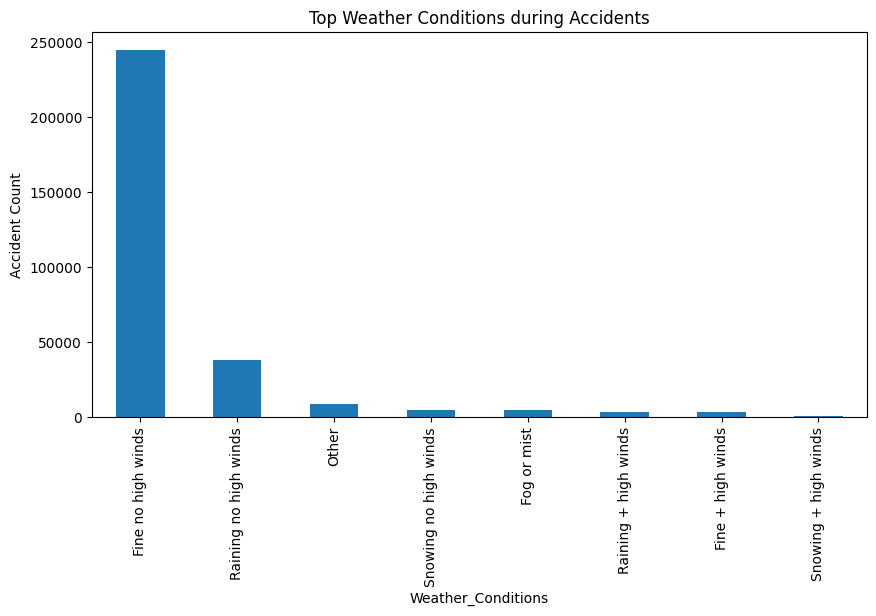

In [16]:
#Weather Condition Analysis

plt.figure(figsize=(10,5))
df['Weather_Conditions'].value_counts().head(10).plot(kind='bar')
plt.title('Top Weather Conditions during Accidents')
plt.ylabel('Accident Count')
plt.show()

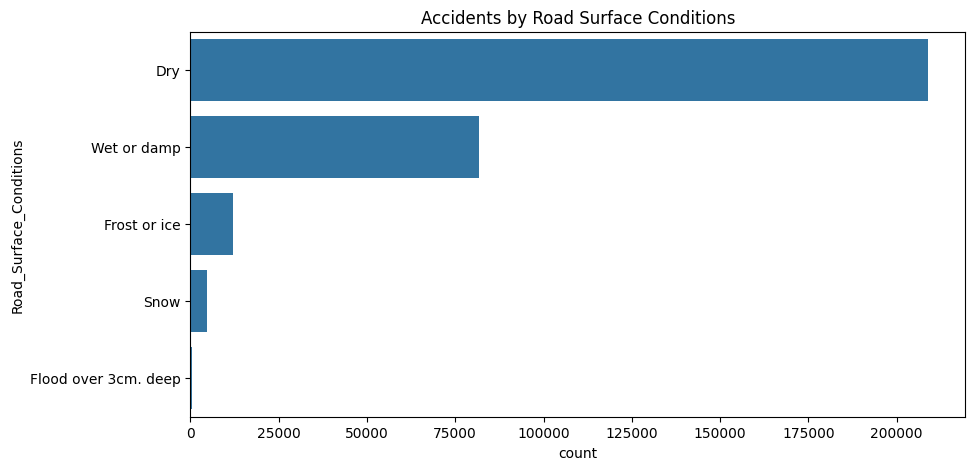

In [18]:
#Road Surface Condition Analysis

plt.figure(figsize=(10,5))
sns.countplot(y='Road_Surface_Conditions',data=df)
plt.title("Accidents by Road Surface Conditions")
plt.show()



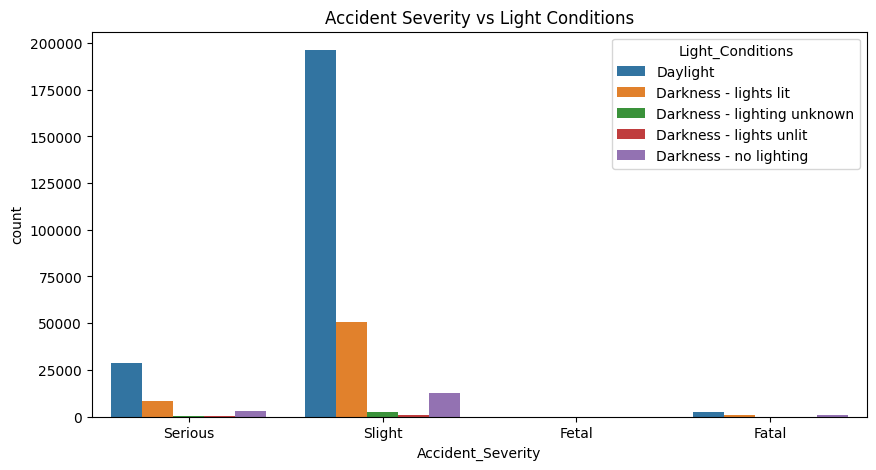

In [19]:
#Severity vs Ligght Conditions

plt.figure(figsize=(10,5))
sns.countplot(x="Accident_Severity",hue="Light_Conditions",data=df)
plt.title("Accident Severity vs Light Conditions")
plt.show()

In [24]:
#Accident Hotspot Visualization

import folium

map_ = folium.Map(
    location=[df['Latitude'].mean(),df['Longitude'].mean()],
    zoom_start=6
)

for _, row in  df.sample(1000).iterrows():
  folium.CircleMarker(
      location=[row['Latitude'],row['Longitude']],
      radius=2,
      color='green',
      fill=True
  ).add_to(map_)

map_

Dense clusters indicate accident hotspots in urban regions.

Conclusion:-

This analysis identified clear accident patterns based on time of day, weather, and road conditions. Poor road surfaces and low-visibility conditions contribute significantly to accident frequency and severity. Hotspot mapping highlights high-risk urban areas that require targeted safety measures.